In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os, os.path
import keras
import time
import scipy.misc
import scipy.ndimage

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from keras import backend as K
from keras.initializers import RandomUniform

from PIL import Image

%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5110)


In [7]:
def visualize(model, img):
    #print(img.shape)
    #img_batch = np.expand_dims(img, axis=0)
    #print(img_batch.shape)
    conv_img = model.predict(img)
    #print(conv_img.shape)
    
    res_img = np.squeeze(conv_img, axis=0)
    #print('Shape of conv: {}'.format(res_img.shape))
    
    num_filter = res_img.shape[2]
    n = int(np.ceil(np.sqrt(num_filter)))
    
    #print('Numb of filters: {}'.format(num_filter))
    
    #print('Before reshaping: {}'.format(res_img.shape))
    res_img1 = np.transpose(res_img)
    #print('After transposing: {}'.format(res_img1.shape))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    
    for i in range(num_filter):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(np.transpose(res_img1[i]), cmap='gray')

    return fig
    
def reshape_grayscale_img(img):    
    # When using the Theano backend, you must explicitly declare a dimension for the depth of the input image.
    # For example, a full-color image with all 3 RGB channels will have a depth of 3.
    # Our MNIST images only have a depth of 1, but we must explicitly declare that.
    # In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).
    # Here's how we can do that easily:
    
    x = img.shape[0]
    y = img.shape[1]

    if K.image_data_format() == 'channels_first':
        img = img.reshape(1, 1, x, y)
        input_shape = (1, x, y)
    else:
        img = img.reshape(1, x, y, 1)
        input_shape = (x, y, 1)
        
    return (img, input_shape)

In [1]:
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/windingcontrol/Images_sorted/PosTrain/IMG11931.bmp'))

plt.imshow(img,cmap='gray')

plt.show()

NameError: name 'np' is not defined

In [9]:
print(img.shape)

(600, 800)


In [10]:
reshaped_img = reshape_grayscale_img(img=img)
img = reshaped_img[0]
input_shape = reshaped_img[1]

In [11]:
img.shape

(1, 600, 800, 1)

# Lets create a model and squeeze img through

In [12]:
num_kernel = 9
kernel_size = 3
seed = 1234

In [37]:
model = Sequential()

# First Convolutional layer initialised with random input weights
model.add(Conv2D(num_kernel, (kernel_size, kernel_size), kernel_initializer=RandomUniform(seed=seed), input_shape=input_shape, activation='selu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(num_kernel, (kernel_size, kernel_size), activation='selu'))
model.add(MaxPooling2D(pool_size=(2,2)))



In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 598, 798, 9)       90        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 299, 399, 9)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 297, 397, 9)       738       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 148, 198, 9)       0         
Total params: 828
Trainable params: 828
Non-trainable params: 0
_________________________________________________________________


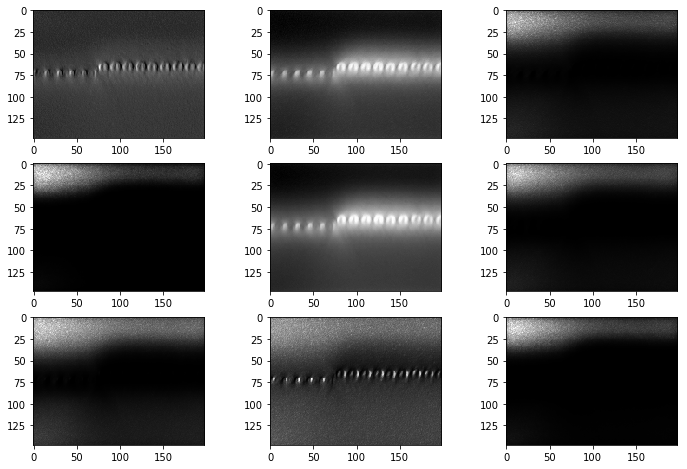

In [39]:
fig = visualize(model, img)
plt.savefig('../Plots/Conv2D_' + str(num_kernel) + str(kernel_size) + '_seed=' + str(seed) + '_selu.png')

In [3]:
layer_sizes = [ [13, 11, 9], [13, 9, 9], [11, 11, 9], [11, 9, 9], [11, 9, 7], [9, 7, 7] ]

In [4]:
layer_sizes[0]

[13, 11, 9]

In [5]:
layer_sizes[0][0]

13

In [6]:
for sizes in layer_sizes:
    print('8{:d}_16{:d}_16{:d}'.format(sizes[0], sizes[1], sizes[2]))

813_1611_169
813_169_169
811_1611_169
811_169_169
811_169_167
89_167_167


## Play around with Cat pic

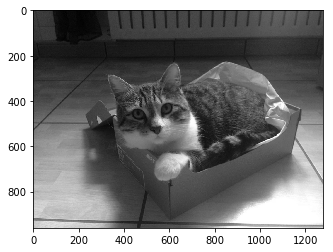

In [67]:
Kater = np.array(Image.open('../Cat.jpg').convert('L'))
plt.imshow(Kater, cmap='gray')

In [68]:
Kater_small = scipy.misc.imresize(Kater, (600,800))
#plt.imshow(Kater_small, cmap='gray')

In [69]:
Reshaped_Kater = reshape_grayscale_img(Kater_small)

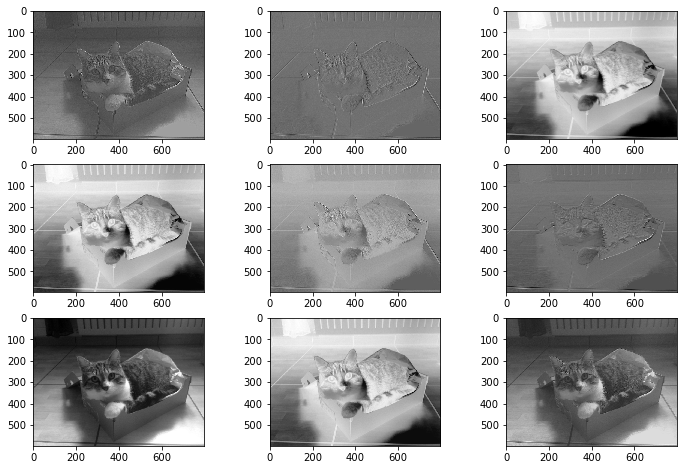

In [75]:
visualize(model, Reshaped_Kater[0])
plt.savefig('../Plots/Conv2D_' + str(num_kernel) + str(kernel_size) + '_Fynn.png', transparency=True)